In [3]:
import seaborn
df=seaborn.load_dataset("titanic")

import pandas as pd
df=df.drop(["class","adult_male","who","embark_town","alive","alone"], axis=1) 
#removes columns that repeat each other

df = df.replace(['male'],'1') 
df=df.replace(['female'],"0")
#creates a dummy variable for gender

df=pd.get_dummies(df, columns=["embarked"],drop_first=True) 
df=pd.get_dummies(df, columns=["deck"],drop_first=True) 
#binominally codes categorical variables

df=df.dropna() 
#missing values are dropped

import numpy as np
import matplotlib.pyplot as plt

X = np.array(df.drop(columns=['survived']))
y = np.array(df['survived'].values)
#survived is set to be the dependent variable

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [ ]:
#cross validation using out of bag accuracy

In [15]:
Oob_Accuracy=[]
for i in range(1,14):
    clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7828371278458844
1,2,0.7933450087565674
2,3,0.8021015761821366
3,4,0.809106830122592
4,5,0.8073555166374781
5,6,0.8073555166374781
6,7,0.8143607705779334
7,8,0.8038528896672504
8,9,0.809106830122592
9,10,0.8021015761821366


In [ ]:
#optimum number of features seems to be 7

In [16]:
clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=7,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7902097902097902


In [17]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

In [18]:

clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.0s


{'max_features': 10, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   41.2s finished


In [ ]:
#searching across the combination of different numbers of tress and different numbers of features,
#optimum is 10 features and 100 trees

In [19]:
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=10,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7972027972027972


In [ ]:
#accuracy improved from the initial model

In [21]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X[train_index], X[validation_index], 
    y_train, y_test = y[train_index], y[validation_index]

    clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

    clf_grid.fit(X_train, y_train)

    print(clf_grid.best_params_)

    clf=RandomForestClassifier(**clf_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    CVErrors.append(accuracy_score(y_test, y_pred))
np.mean(CVErrors)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   51.5s finished


{'max_features': 10, 'n_estimators': 300}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   45.2s finished


{'max_features': 6, 'n_estimators': 400}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   46.0s finished


{'max_features': 5, 'n_estimators': 200}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   46.8s finished


{'max_features': 9, 'n_estimators': 400}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   47.3s finished


{'max_features': 9, 'n_estimators': 200}


0.8081453757510095

In [ ]:
#mean CV accuracy is 0.808

In [22]:

clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)

clf_grid.fit(X_train, y_train)

print(clf_grid.best_params_)


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   48.5s finished


{'max_features': 6, 'n_estimators': 500}


In [ ]:
#scoring roc auc scores, the optimum number of trees is updated

In [72]:
clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[71 11]
 [17 43]]
0.8028169014084507


In [ ]:
#matrix shows that 11 people were falsely identified as survived and 17 people were falsely
#identified as dead

In [71]:
clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred_proba=np.array(clf.predict_proba(X_test))

In [ ]:
#probabilities are calculated to determine the roc auc scores in the next step

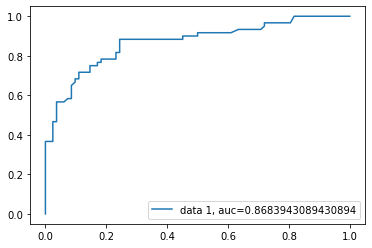

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#graph shows convergence to the ideal roc curve
#auc is 0.8683, typically scores above 0.8 are accepted

In [73]:
heights=clf.feature_importances_.tolist()


In [62]:
centers=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]

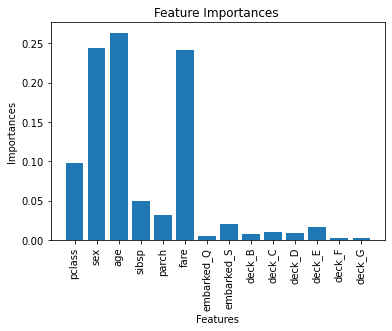

In [69]:

    
plt.bar(centers,heights)
    
plt.title("Feature Importances ")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["pclass", "sex","age","sibsp","parch","fare","embarked_Q","embarked_S","deck_B","deck_C","deck_D","deck_E","deck_F","deck_G",])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importances")


plt.show()
    

In [ ]:
#every features importance is shown